In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
#from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

#from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

pd.set_option('display.max_columns', None)

In [11]:
df = pd.read_csv('Total_Employee.csv')
df = df[df['Employee Status']!='Unpaid Leave']
df.shape

(315, 38)

In [12]:
# Separating the continous and categorical data
con = []
cat = []
for i in df.columns:
    if df[i].dtypes == 'int64':
        con.append(i) 
    elif df[i].dtypes == 'object':
        cat.append(i)

### Univariate Analysis

IndexError: list index out of range

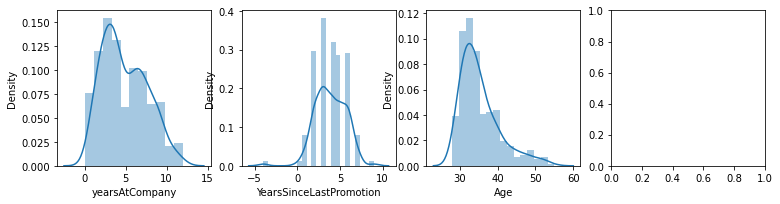

In [13]:
# Checking the distribution of Values in continous features
plt.figure(figsize = (16,20))
for i in range(0,14):
    plt.subplot(6,5,i+1)
    sns.distplot(df[con[i]])

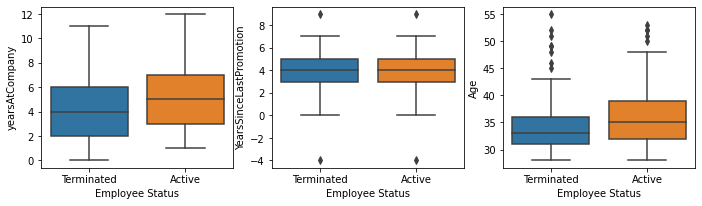

In [14]:
plt.figure(figsize = (20,35))
for i in range(0,len(con)):
    plt.subplot(10,5,i+1)
    sns.boxplot(data = df, x = 'Employee Status', y = df[con[i]])

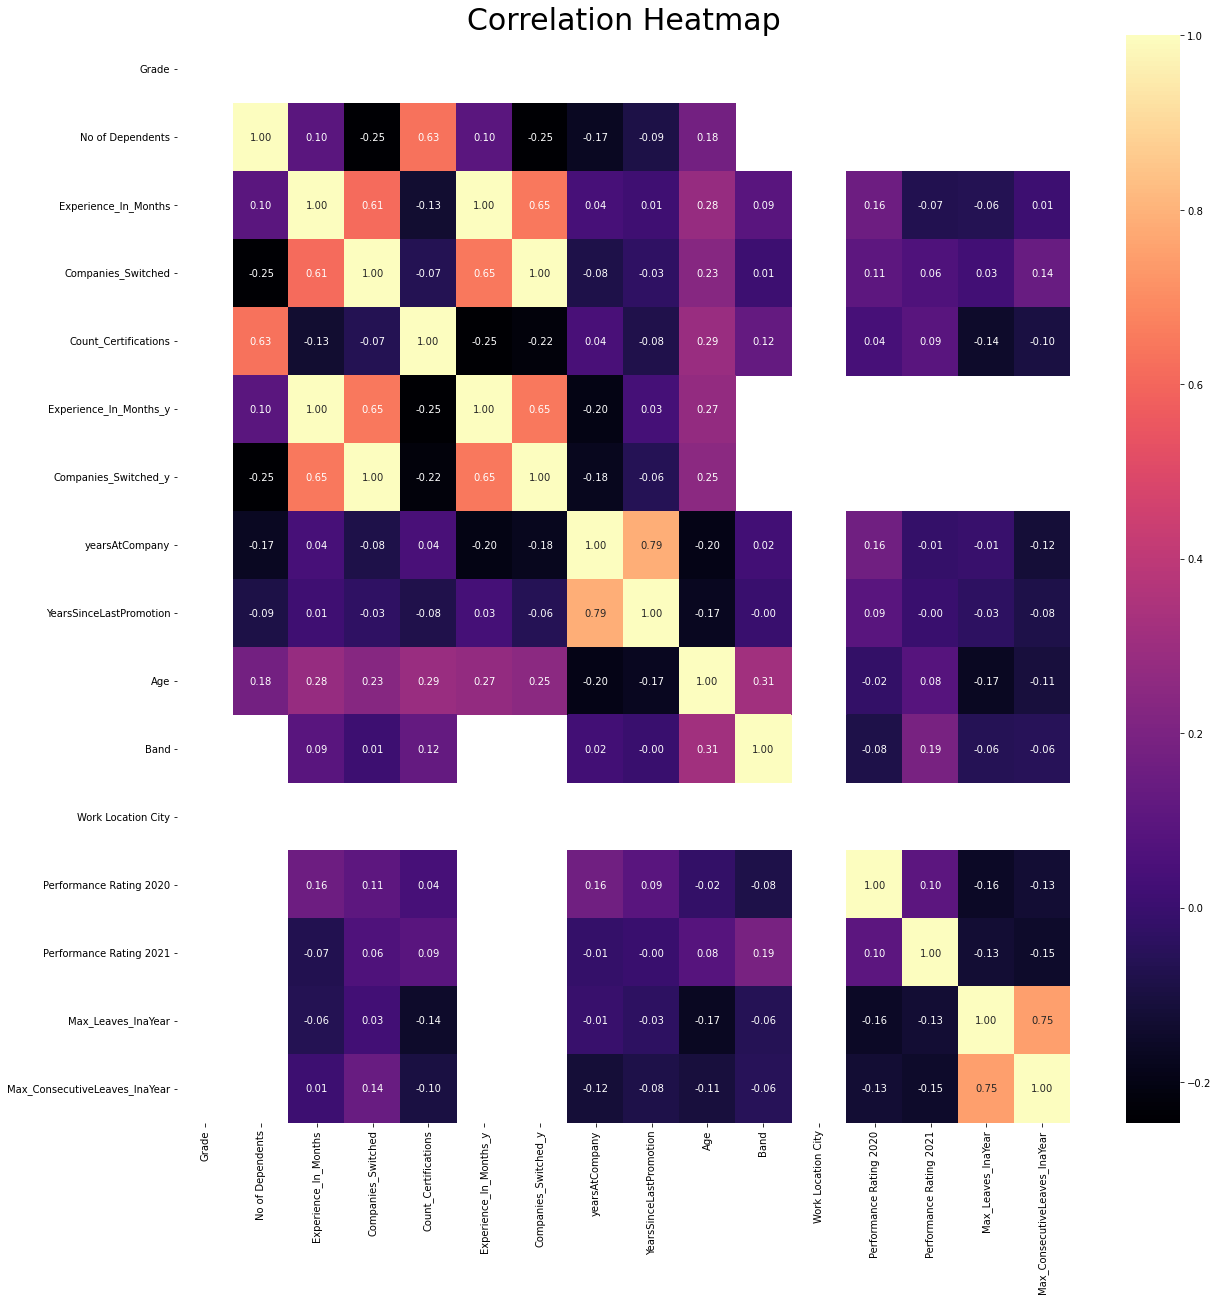

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='magma')
plt.title('Correlation Heatmap', fontsize=30)
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 315
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LPN                                        315 non-null    object 
 1   Employee Status                            315 non-null    object 
 2   Grade                                      160 non-null    float64
 3   Rank Name                                  160 non-null    object 
 4   Service Line                               315 non-null    object 
 5   Sub Service Line                           315 non-null    object 
 6   Region                                     160 non-null    object 
 7   Country/Region                             315 non-null    object 
 8   Event                                      160 non-null    object 
 9   Event Reason                               160 non-null    object 
 10  Exit Date                 

In [ ]:
# Taking out the target variable
Y = df['Attrition']
## Following features are either missing in Active Employees or Terminated Employees
delete1 = ['Country/Region','Event','EventReason','Gender','DateofBirth','MaritalStatus','NoofDependents','Gender','Designation','PerformanceRating2020','PerformanceRating2021','Max_Leaves_InaYear']
# Following are somedatatime columns which are not needed by Model



In [ ]:
models = [] # ML Models
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Logistic Regression", LogisticRegression(solver='liblinear')))
models.append(("SVM", svm.SVC(kernel='linear')))

n_folds = 5
results = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=n_folds)
    print("Testing model:", name)
    
    # Cross Validation Score
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="f1_weighted", verbose=0, n_jobs=-1)
    
    # Fitting the Model
    model.fit(X_train,y_train)
    
    # Model Predictions and Finding Accuracy
    train_pred = model.predict(X_train)
    Training_score = accuracy_score(train_pred,y_train)
    test_pred = model.predict(X_test)
    Test_score = accuracy_score(test_pred,y_test)
    
    results.append(cv_results)
    
    msg = f"Cross_Val Mean: {cv_results.mean()}, Training Accuracy: {Training_score}, Testing Accuracy: {Test_score}"
    print(msg + "\n")